# Sommaire :

<a href="#A1">**Partie 1 : Introduction**</a>
 - <a href="#C1">1-1-Objectif et sélection de l'indicateur</a>
 - <a href="#C2">1-2-Importation des librairies et des données</a>
 - <a href="#C3">1-3-Description de la base de données</a>
 
<a href="#A2">**Partie 2 : Nettoyage du jeu de données**</a>
 - <a href="#C5">2-1-Suppression des variables inutiles et des produits étrangers pour l'analyse</a>
 - <a href="#C6">2-2-Suppression des colonnes vides</a>
 - <a href="#C7">2-3-Suppression des valeurs dupliquées</a>
 - <a href="#C8">2-4-Remise en conformité des types</a>
 - <a href="#C9">2-5-Suppression des valeurs abérrantes</a>
 - <a href="#C10">2-6-Suppression des outliers (méthode interquartile)</a> 
 - <a href="#C13">2-7-Régression multilinéaire</a>
 - <a href="#C15">2-8-Imputation de valeurs catégorielles (HotEncoding et K-NN)</a>

# <a name="A1"> Partie 1 : Introduction</a>

## <a name="#C1">1-1-Objectif et idée d'application</a>

A partir de la base de données de l'AHS je propose l'idée d'une application de nutriscore pour le régime sans résidu. Le régime sans résidu consiste à réduire l'apport en fibre, aliments gras, lactose et alcool tout en favorisant la consommation des aliments les plus énergétiques, protéinés et riches en carbohydrates.

## <a name="C2"> 1-2-Importation des librairies et des données</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from matplotlib.collections import LineCollection
from tqdm import tqdm
import sklearn
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_csv('fr_openfoodfacts_org_products.csv',sep='\t')

C:\Users\John\AppData\Local\Temp\ipykernel_9300\1006167776.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('fr_openfoodfacts_org_products.csv',sep='\t')


## <a name="C3">1-3-Description de la base de données<a>

In [3]:
datahead=data.head()

In [4]:
print('data shape : ',data.shape)

data shape :  (320772, 162)


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_nutriments,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
additives_n,248939.0,1.936024,2.502019,0.0,0.00,1.00,3.0,31.0
ingredients_from_palm_oil_n,248939.0,0.019659,0.140524,0.0,0.00,0.00,0.0,2.0
ingredients_from_palm_oil,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ingredients_that_may_be_from_palm_oil_n,248939.0,0.055246,0.269207,0.0,0.00,0.00,0.0,6.0
...,...,...,...,...,...,...,...,...
carbon-footprint_100g,268.0,341.700764,425.211439,0.0,98.75,195.75,383.2,2842.0
nutrition-score-fr_100g,221210.0,9.165535,9.055903,-15.0,1.00,10.00,16.0,40.0
nutrition-score-uk_100g,221210.0,9.058049,9.183589,-15.0,1.00,9.00,16.0,40.0
glycemic-index_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <a name="A2">**Partie 2 : Nettoyage du jeu de données**</a>

## <a name="C5">2-1-Suppression des variables inutiles et des produits étrangers pour l'analyse</a>

In [6]:
#les variables conservées sont les variables catégorielles et les variables quantitatives suivantes :
features_21 = ['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime', 'product_name','brands', 'categories_fr', 'countries_fr', 'ingredients_text', 'additives_fr', 'nutrition_grade_uk', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'main_category_fr', 'image_url', 'image_small_url', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'omega-6-fat_100g', 'omega-9-fat_100g', 'trans-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'sucrose_100g', 'glucose_100g', 'fructose_100g', 'lactose_100g', 'fiber_100g', 'proteins_100g', 'serum-proteins_100g', 'alcohol_100g', 'fruits-vegetables-nuts_100g', 'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'glycemic-index_100g']
pd.DataFrame(features_21)

,0
0,code
1,url
2,creator
3,created_datetime
4,last_modified_datetime
5,product_name
6,brands
7,categories_fr
8,countries_fr
9,ingredients_text


In [7]:
#on conserve seulement les colonnes de la base qui nous intéressent
data_21 = data[features_21]

In [8]:
#on filtre la colonne 'countries_fr' sur le mot 'France'
data_21=data_21.loc[data['countries_fr'].str.contains('France')==True,:]

## <a name="C6">2-2-Suppression des colonnes vides</a>

<AxesSubplot:>

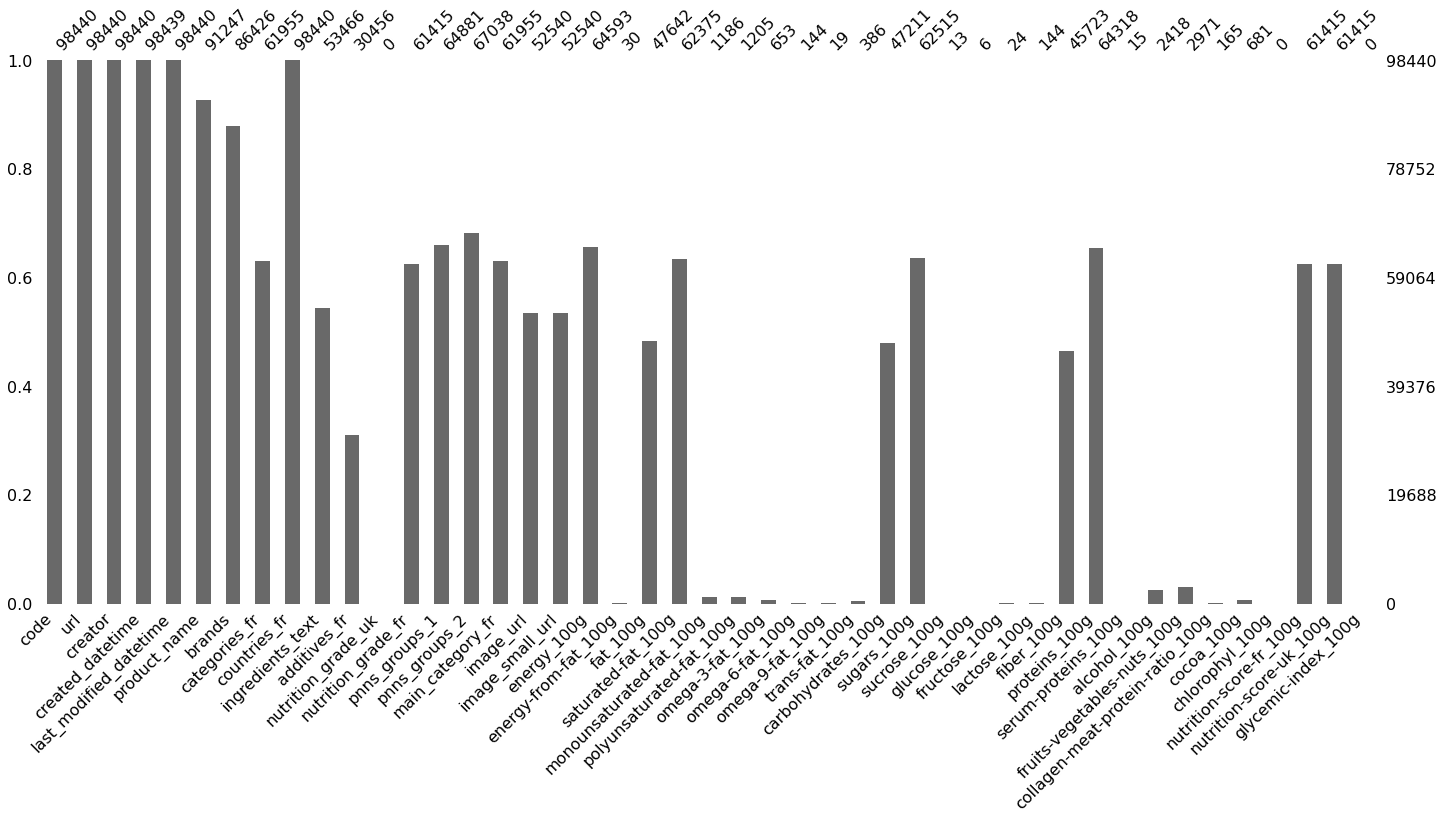

In [9]:
#Avant suppression - 3 colonnes complètements vides
data_22=data_21.copy()
msno.bar(data_22)

old shape :  (98440, 45)
new shape :  (98440, 42)


<AxesSubplot:>

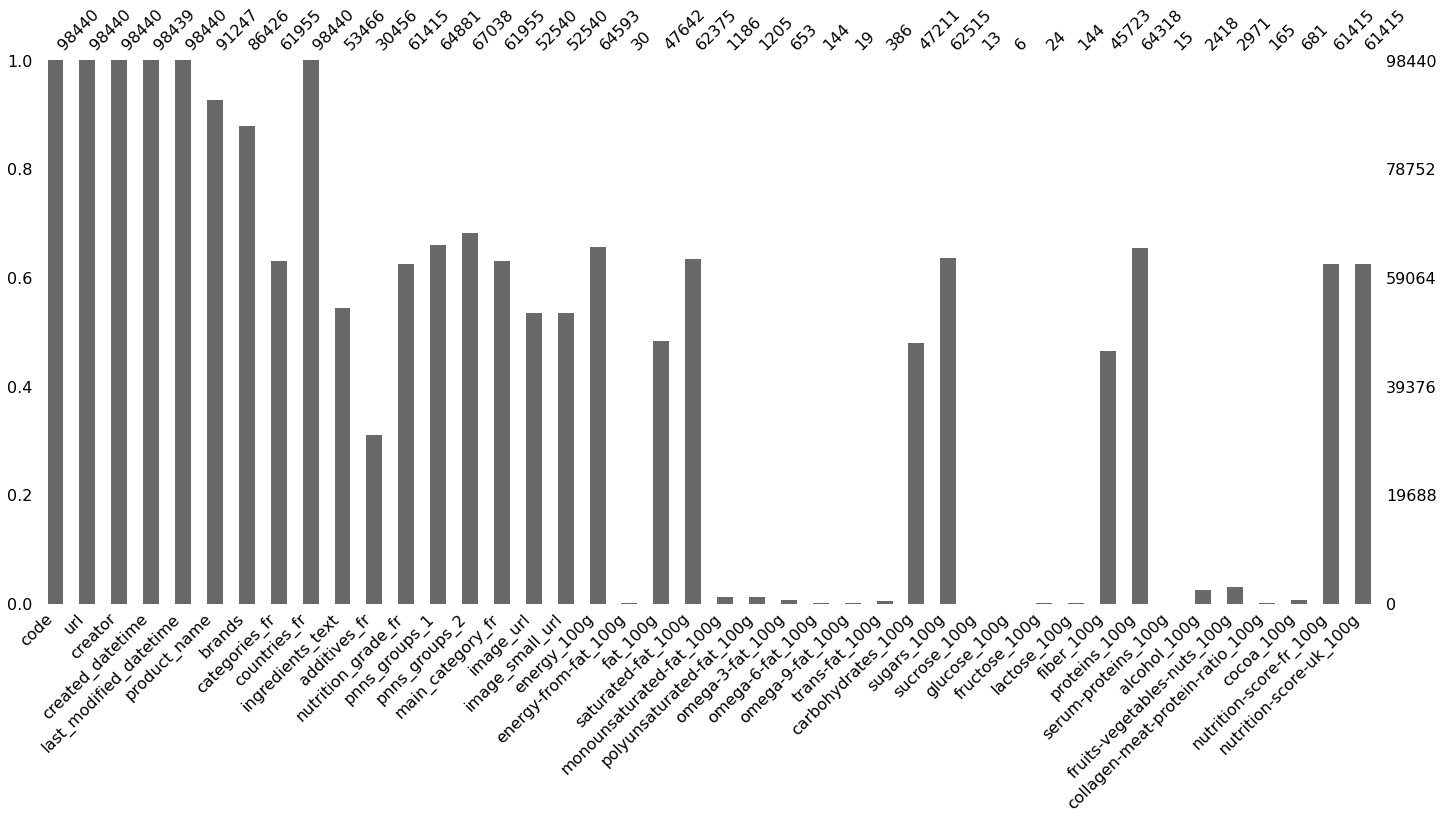

In [10]:
#Après suppression
data_22=data_22.dropna(axis=1,how='all')
print('old shape : ', data_21.shape)
print('new shape : ', data_22.shape)  
msno.bar(data_22)

## <a name="C7">2-3-Suppression des valeurs dupliquées</a>

In [11]:
#Vérification de la présence de doublons => il n'y a pas de doublons
data_23=data_22.copy()
data_23.shape

(98440, 42)

In [12]:
#Il y a néanmoins des lignes qui sans être complètement dupliquées représentent les même produits ou sont vides. 
#exemple ci-dessous :
data_23a=data_23.loc[:,['product_name','brands','energy_100g','nutrition-score-fr_100g']].copy()
data_23a.loc[data_23a.duplicated(keep=False),:].sort_values('product_name')

,product_name,brands,energy_100g,nutrition-score-fr_100g
221137,100% Pur Boeuf 5% MG,Bigard,NaN,NaN
221136,100% Pur Boeuf 5% MG,Bigard,NaN,NaN
221135,100% Pur Boeuf 5% MG,Bigard,NaN,NaN
174934,12 crevettes apéritives,Picard,1120.0,17.0
219537,12 crevettes apéritives,Picard,1120.0,17.0
...,...,...,...,...
320718,NaN,NaN,NaN,NaN
320745,NaN,NaN,NaN,NaN
320746,NaN,NaN,NaN,NaN
320747,NaN,NaN,NaN,NaN


In [13]:
#On supprime toutes les lignes en doublon ou vides pour ces rubriques et en gardant seulement la première occurrence 
#rencontrée.
#AVANT
data_23.loc[:,['product_name','brands','energy_100g','nutrition-score-fr_100g']].duplicated(keep=False).sum()

9561

In [14]:
#APRES
data_23a=data_23.loc[:,['product_name','brands','energy_100g','nutrition-score-fr_100g']].copy()
data_23a=data_23a.drop_duplicates(keep='first')

data_23=data_23.loc[data_23a.index,:]
data_23.shape

(90244, 42)

In [15]:
print(98440-90244,'lignes supprimées')

8196 lignes supprimées


# <a name="C8">2-4-Remise en conformité des types</a>

In [16]:
pd.DataFrame(data_23.dtypes)[21:]

,0
monounsaturated-fat_100g,float64
polyunsaturated-fat_100g,float64
omega-3-fat_100g,float64
omega-6-fat_100g,float64
omega-9-fat_100g,float64
trans-fat_100g,float64
carbohydrates_100g,float64
sugars_100g,float64
sucrose_100g,float64
glucose_100g,float64


In [17]:
#on met les colonnes dont la fin se termine en '_datetime' au format datetime
data_24 = data_23.copy()
data_24['created_datetime']=pd.to_datetime(data_24['created_datetime'])
data_24['last_modified_datetime']=pd.to_datetime(data_24['last_modified_datetime'])

## <a name="C9">2-5-Suppression des valeurs abérrantes</a>

In [18]:
#la liste des variables quantitatives
data_25=data_24.copy()
features_num=[]
for i in data_25.columns :
    if data_25[i].dtype=='float64':
        features_num.append(i)

In [19]:
data_25.describe().T

,count,mean,std,min,25%,50%,75%,max
energy_100g,63800.0,1172.760237,12915.039248,0.0000,429.000,1037.000,1648.000,3251373.0
energy-from-fat_100g,30.0,547.471667,574.728341,0.0000,62.900,208.500,881.500,1830.0
fat_100g,46915.0,13.304333,16.847081,0.0000,1.300,6.900,21.000,380.0
saturated-fat_100g,61593.0,5.427486,8.525520,0.0000,0.300,2.000,7.400,210.0
monounsaturated-fat_100g,1162.0,18.565052,22.062122,0.0000,2.600,9.050,26.000,82.0
polyunsaturated-fat_100g,1181.0,9.736153,14.965343,0.0000,1.500,3.400,10.300,75.0
omega-3-fat_100g,644.0,3.124195,4.969560,0.0005,0.900,1.915,3.210,60.0
omega-6-fat_100g,139.0,18.381309,18.698270,0.0500,3.755,13.300,24.300,71.0
omega-9-fat_100g,19.0,43.960526,23.360155,1.0000,27.050,39.000,68.400,75.0
trans-fat_100g,378.0,0.194931,0.989291,0.0000,0.000,0.000,0.100,17.2


In [20]:
#features_num sans les nutriscores
features_num_0=features_num[:-2]
#features_num sans les nutriscores et les énergies
features_num_0_100=features_num[2:-2]

In [21]:
#visualisation des distributions
def univar(data_X,liste_col):
    plt.figure(figsize=(10,10))
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
                'markerfacecolor':'firebrick'}
    liste=[]
    titres=[]
    for i in liste_col:
        
        data=data_X.loc[(data_X[i]==data_X[i]),:]
        data=data[i]
        liste.append(data)
        titres.append(i)
        
    plt.boxplot(liste, showfliers=True, medianprops=medianprops, 
                    vert=False, patch_artist=True, showmeans=True, meanprops=meanprops,labels=titres)#labels=titres
    
    plt.show()


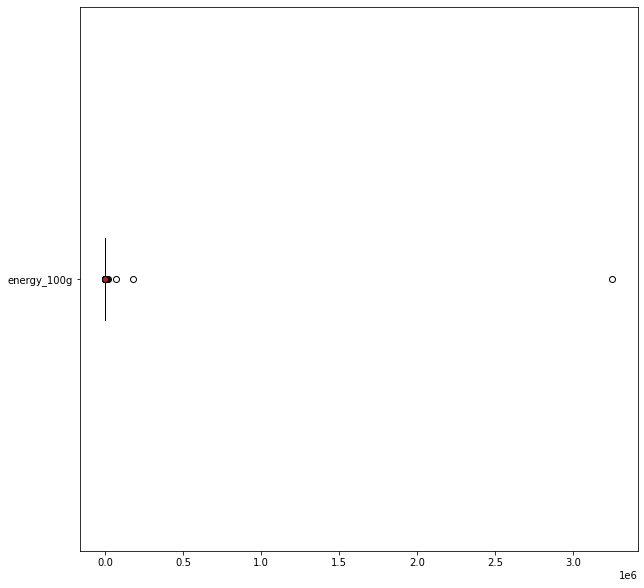

In [22]:
#Distributions des variables avant nettoyage
univar(data_25,features_num[0:1])

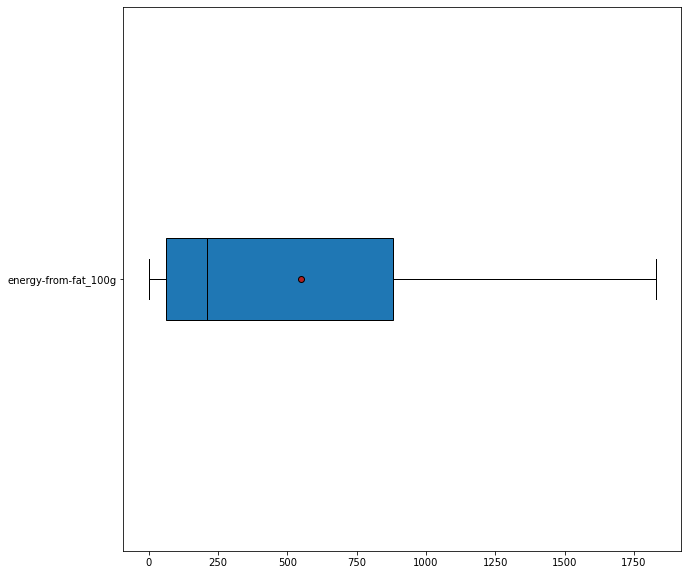

In [23]:
univar(data_25,features_num[1:2])

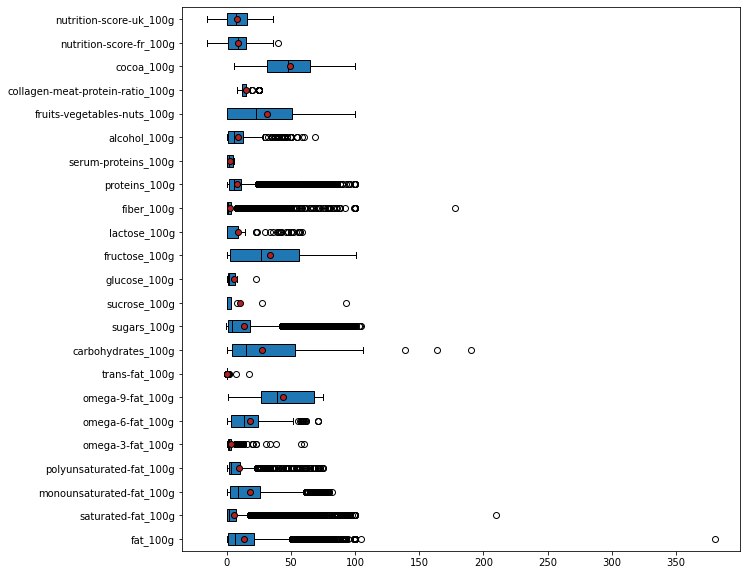

In [24]:
univar(data_25,features_num[2:])

In [25]:
#on supprime toues les valeurs > 100 ou < 0 sur les variables concernées
#on doit s'assurer que l'index et les indices correspondent à l'initialisation
data_25.reset_index(inplace=True,drop=True)

for i in features_num_0_100:
    upper=np.where(data_25[i]>100)
    data_25.drop(upper[0],inplace=True)
    data_25.reset_index(inplace=True, drop=True)
    
    lower=np.where(data_25[i]<0)    
    data_25.drop(lower[0],inplace=True)
    data_25.reset_index(inplace=True, drop=True)

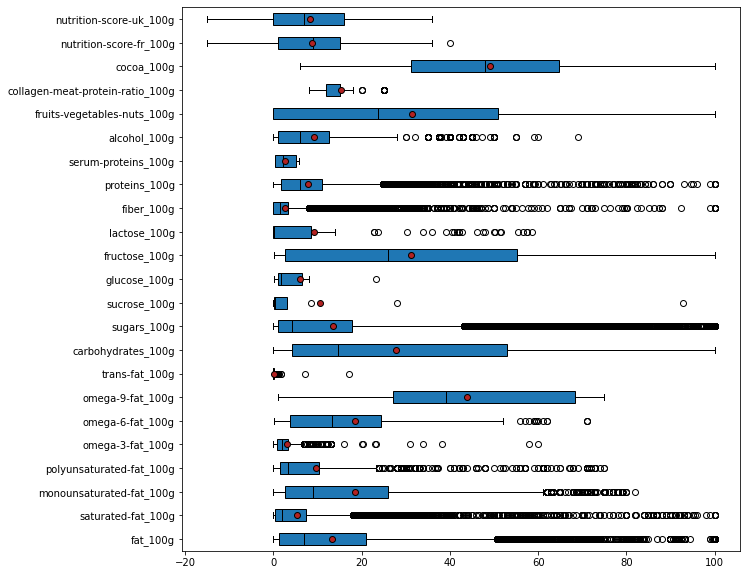

In [26]:
univar(data_25,features_num[2:])

## <a name="C10">2-6-Suppression des outliers (méthode interquartile)</a>

In [27]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [28]:
data_26=data_25.copy()
for i in features_num :
    data_26[i]=remove_outlier_IQR(data_26[i])

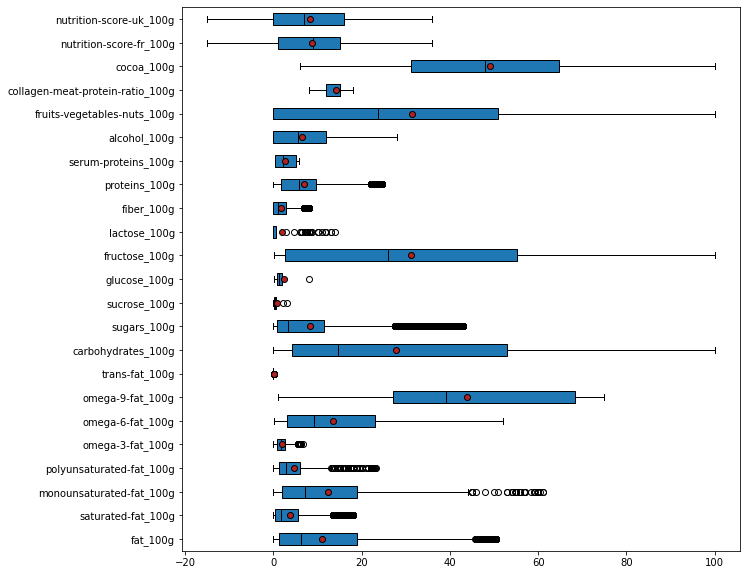

In [29]:
univar(data_26,features_num[2:])

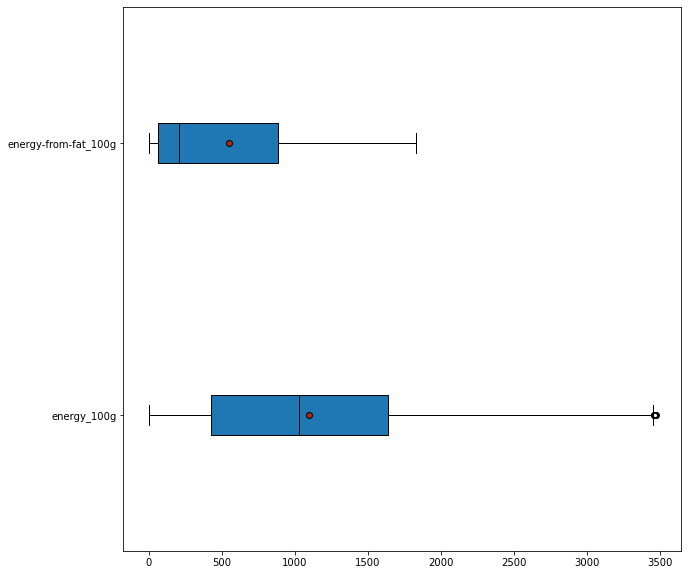

In [30]:
univar(data_26,features_num[0:2])

In [31]:
#Imputation alcohol_100g
#on cherche à voir si des produits alcoolisés n'ont pas été répertoriés dans la colonne pnns_groups_2
data_26.loc[(data_26['pnns_groups_2']!=data_26['pnns_groups_2'])&(data_26['alcohol_100g']>0),['product_name','main_category_fr','pnns_groups_2','alcohol_100g']]

,product_name,main_category_fr,pnns_groups_2,alcohol_100g


In [32]:
#Tous les produits alcoolisés sont répertoriés dans pnns_groups_2
#on impute la valeur 0 à tous les NaN de alcohol_100g
data_26['alcohol_100g']=data_26['alcohol_100g'].fillna(0)

## <a name="C13">2-7-Régression multilinéaire</a>

In [33]:
def multilin(data, features, y_name):
    
    #préparation de la base pour l'apprentissage
    features_x=features.copy()
    features_x.remove(y_name)

    data_=data[features].dropna()

    #les variables
    X=data_[features_x]
    y=data_[y_name]

    try :
        #sampling
        SEED = 42
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

        #apprentissage
        regr=linear_model.LinearRegression()
        model=regr.fit(X_train,y_train)
        #print(f'apprentissage : R2={model.score(X_train,y_train)} et [b0,b1,b2,b3,b4,b5,b6]={model.coef_}')

        #test
        y_pred = model.predict(X_test)
        r2 = model.score(X_test, y_test) 
        print(f'test (y={y_name}): R2={r2}')

        if r2>0.75:

            #prédiction sur les y vides
            #préparation de la base_
            data_=data[features].copy()
            data_=data_.loc[data_[y_name]!=data_[y_name],features]

            for i in features_x:
                data_=data_.loc[data_[i]==data_[i],:]

            #la variable x
            X1=data_[features_x]

            #prédiction
            y1_pred = model.predict(X1)

            #remplacement des cellules vide dans la base_
            data_[y_name]=y1_pred

            #remplacement des cellules <0 par 0
            data_.loc[data_[y_name]<0,:]=0

            #remplacement des cellules vides dans la base de départ data
            data.loc[data_.index,y_name]=data_[y_name].values
            return [data, y_name, r2]
        else:
            print(f'pas de remplacement pour {y_name}')
            return [data, y_name, r2]
    except:
        print (f'pas assez de data pour faire une analyse multilinéaire pour {y_name}')
        return (data)
    

In [34]:
#données d'entrée
features =['fat_100g','saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'alcohol_100g',
 'energy_100g']

In [35]:
#on lance la fonction de regression + imputation
data=data_26.copy()
thisdict={}
for i in features:    
    result=multilin(data,features,i)
    data=result[0]
    thisdict[result[1]]=result[2]
data_27=data

test (y=fat_100g): R2=0.9350976522099782
test (y=saturated-fat_100g): R2=0.6116473333464028
pas de remplacement pour saturated-fat_100g
test (y=carbohydrates_100g): R2=0.9537158058126867
test (y=sugars_100g): R2=0.4284247944045968
pas de remplacement pour sugars_100g
test (y=fiber_100g): R2=0.30773399979600446
pas de remplacement pour fiber_100g
test (y=proteins_100g): R2=0.5578430543815325
pas de remplacement pour proteins_100g
test (y=alcohol_100g): R2=0.0010578626811922343
pas de remplacement pour alcohol_100g
test (y=energy_100g): R2=0.9824498919788888


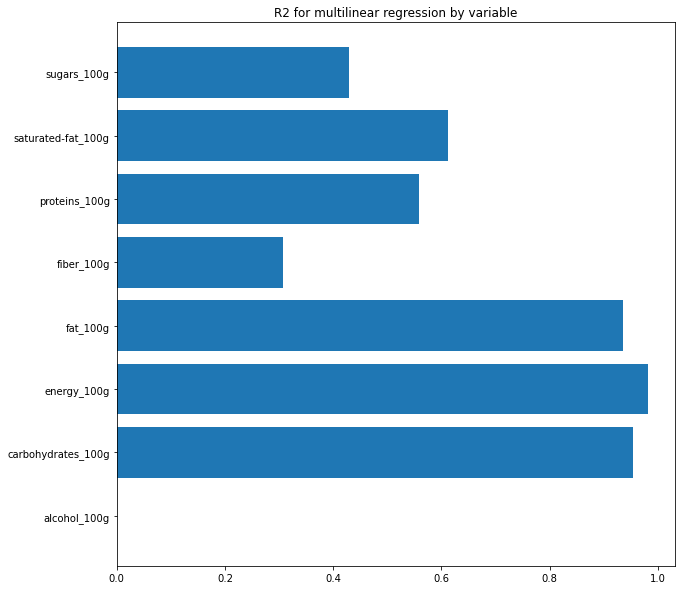

In [36]:
#Le graphe des scores R2
plt.figure(figsize=(10,10))
plt.barh(*zip(*sorted(thisdict.items())))
plt.title('R2 for multilinear regression by variable')
plt.show()

<AxesSubplot:>

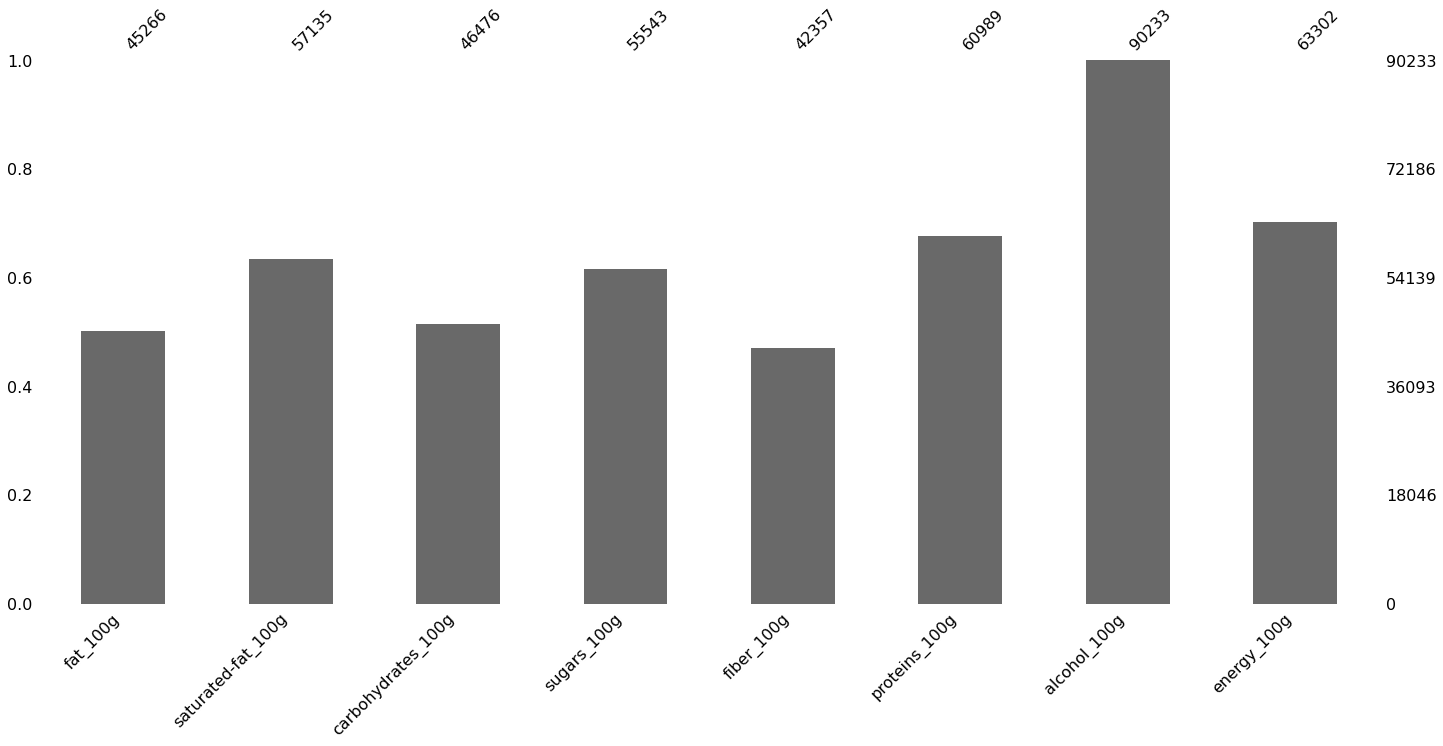

In [37]:
#AVANT régression multilinéaire
msno.bar(data_26[features])

<AxesSubplot:>

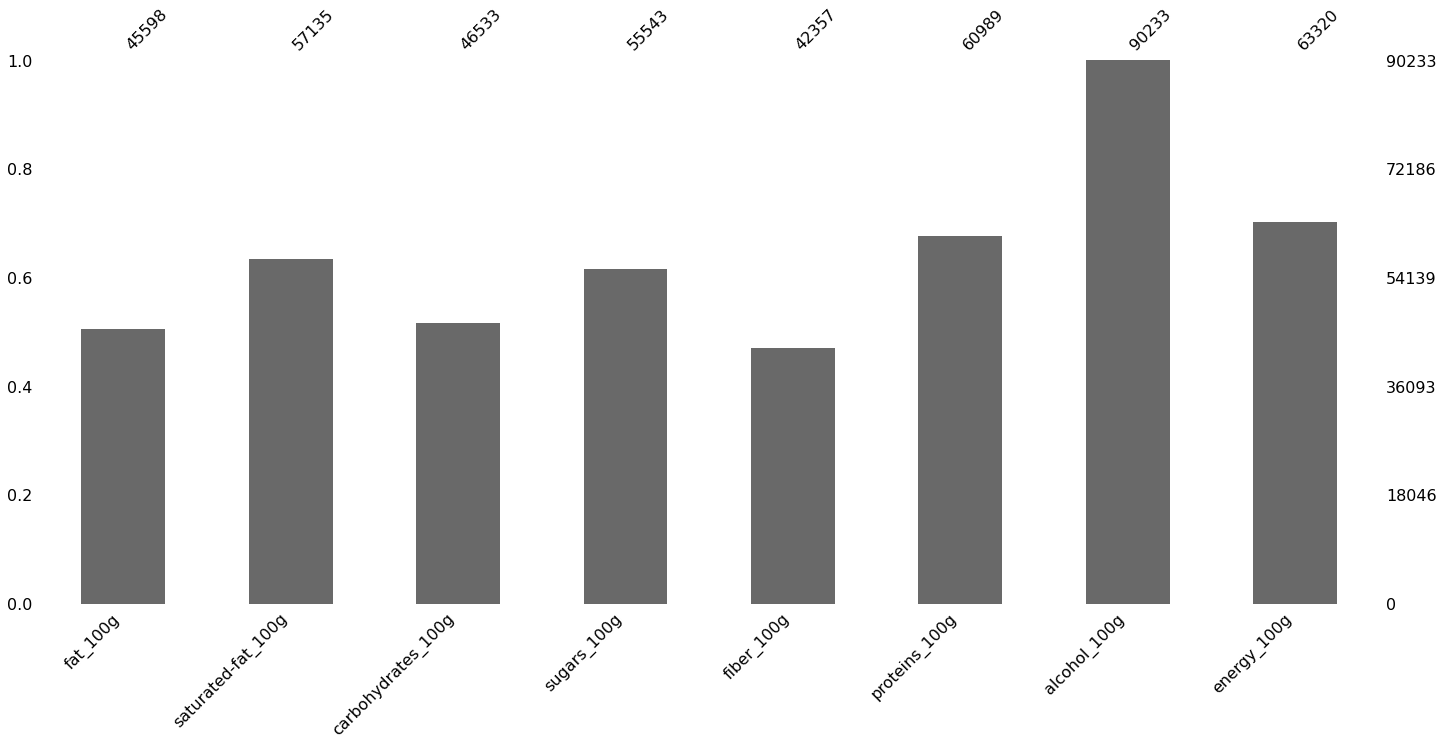

In [38]:
#APRES régression multilinéaire
msno.bar(data_27[features])

In [39]:
#On réduit la base à toutes les lignes pour lesquelles les col de features sont remplies à 100%
index_with_nan = data_27.index[data_27.loc[:,features].isna().any(axis=1)]                            

In [40]:
data_27.drop(labels=index_with_nan,axis=0, inplace=True)

In [41]:
data_27.shape

(22621, 42)

## <a name="C15">2-8-Imputation de valeurs catégorielles (HotEncoding et K-NN)</a>

In [42]:
#Préparation de la base : on remplace tous les 'unknow' par des NaN
#et on remet de l'ordre dans les noms de catégorie
data_i=data_27.copy()
data_i['pnns_groups_2']=data_i['pnns_groups_2'].replace('unknown',np.NaN)
data_i['pnns_groups_2']=data_i['pnns_groups_2'].replace('vegetables','Vegetables')
data_i['pnns_groups_2']=data_i['pnns_groups_2'].replace('legumes','Vegetables')
data_i['pnns_groups_2']=data_i['pnns_groups_2'].replace('Legumes','Vegetables')
data_i['pnns_groups_2']=data_i['pnns_groups_2'].replace('fruits','Fruits')
data_i['pnns_groups_2']=data_i['pnns_groups_2'].replace('cereals','Cereals')

<AxesSubplot:>

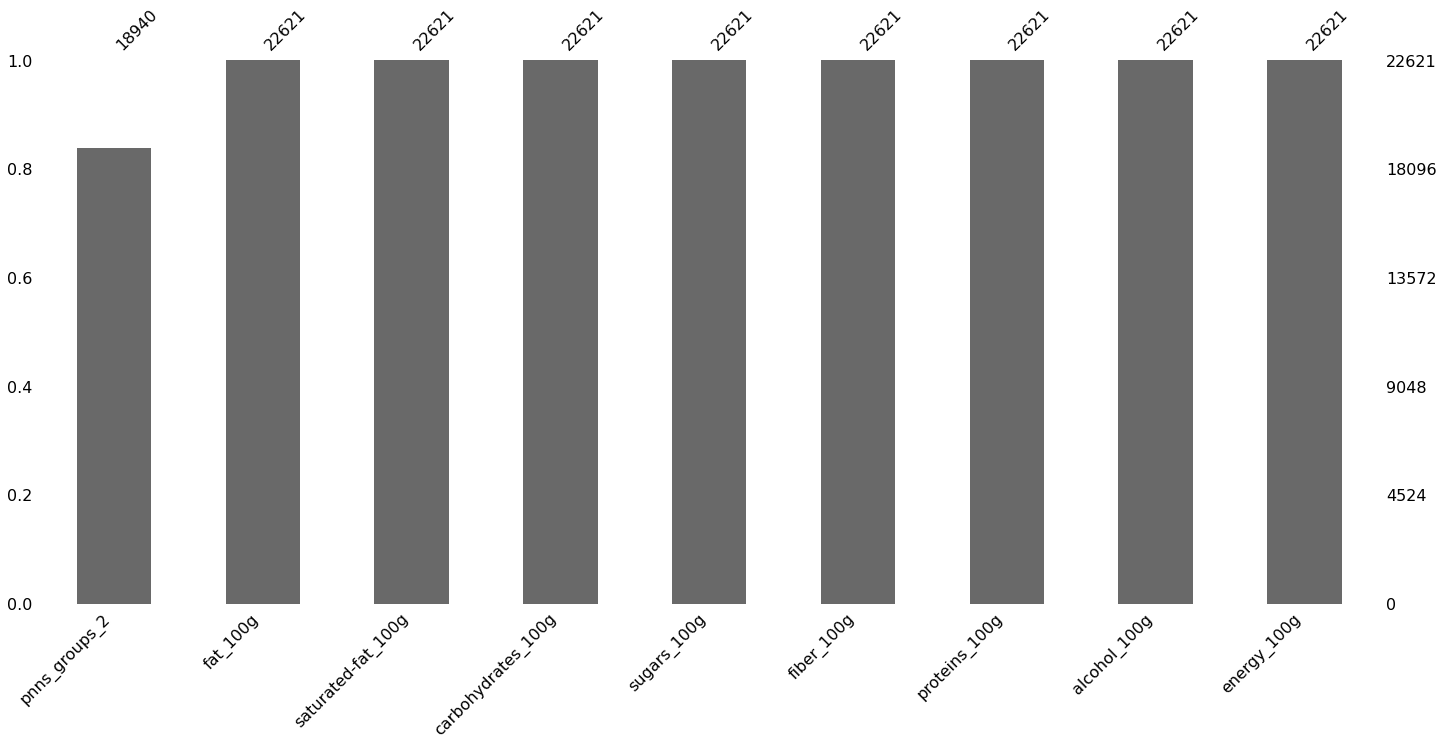

In [43]:
#état initial :
msno.bar(data_i.loc[:,['pnns_groups_2']+features])

In [44]:
#on encode la col pnns_groups_2 dans data_i => df_
df_ = pd.get_dummies(data_i, columns = ['pnns_groups_2'],dummy_na=True).copy()
df_=pd.DataFrame(df_)

In [45]:
# on remplace les 0 par des nan dans les colonnes encodées quand la col nan est à 1 
#et ensuite on met la colonne nan à 0 partout
for i in df_.index:
    if df_.loc[i,'pnns_groups_2_nan']==1:
        for j in [c for c in df_.columns if c.startswith('pnns_groups_2_')]:
            df_.loc[i,j]=np.NaN
    df_.loc[i,'pnns_groups_2_nan']=0

<AxesSubplot:>

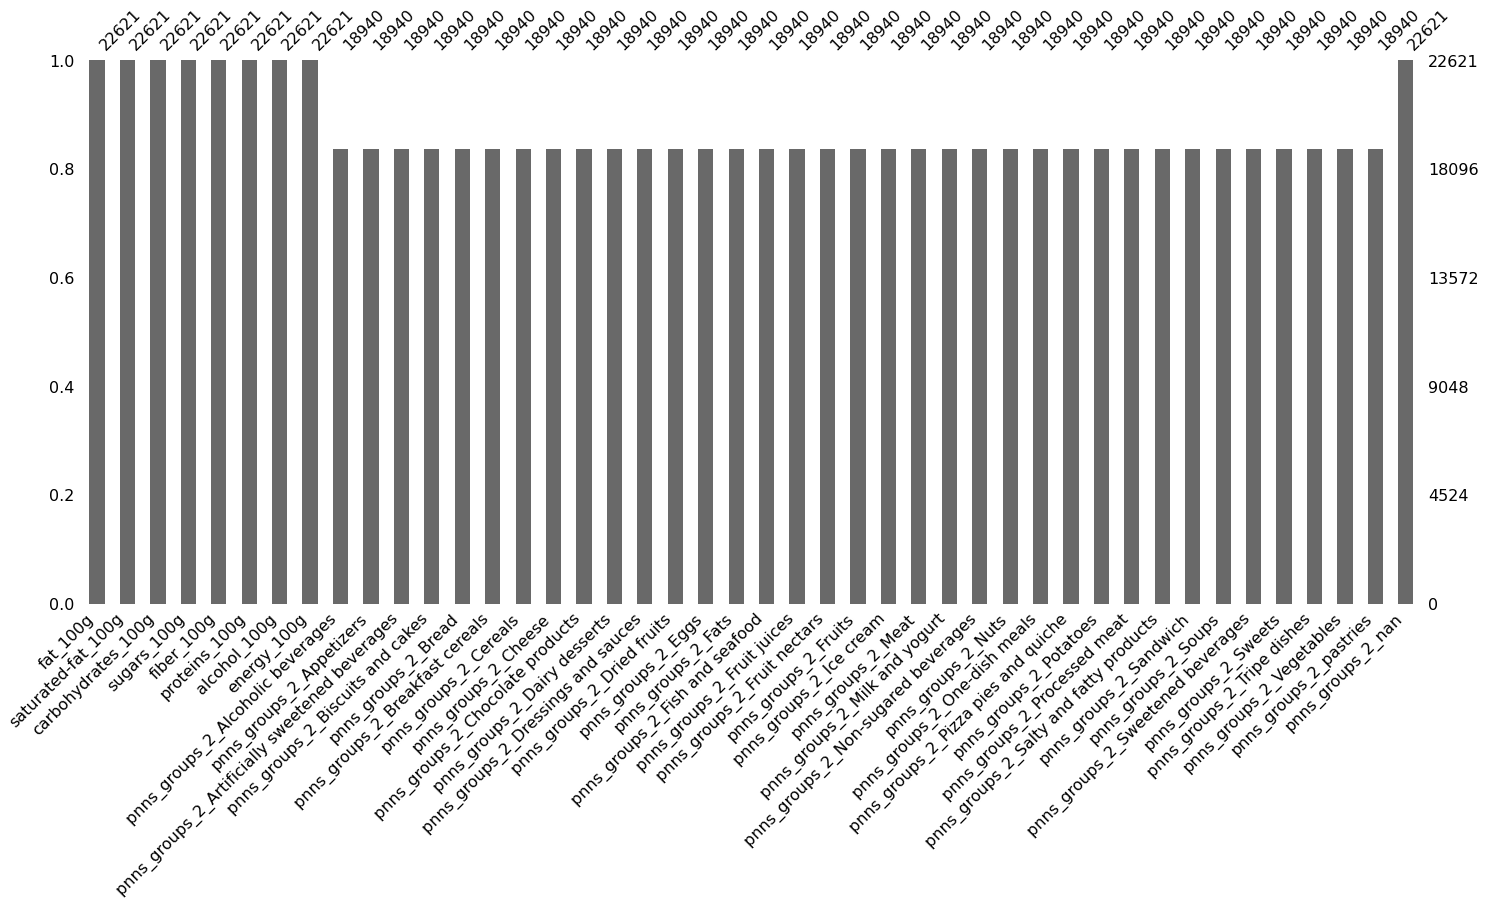

In [46]:
msno.bar(df_.loc[:,features+[c for c in df_.columns if c.startswith('pnns_groups_2_')]])

<AxesSubplot:>

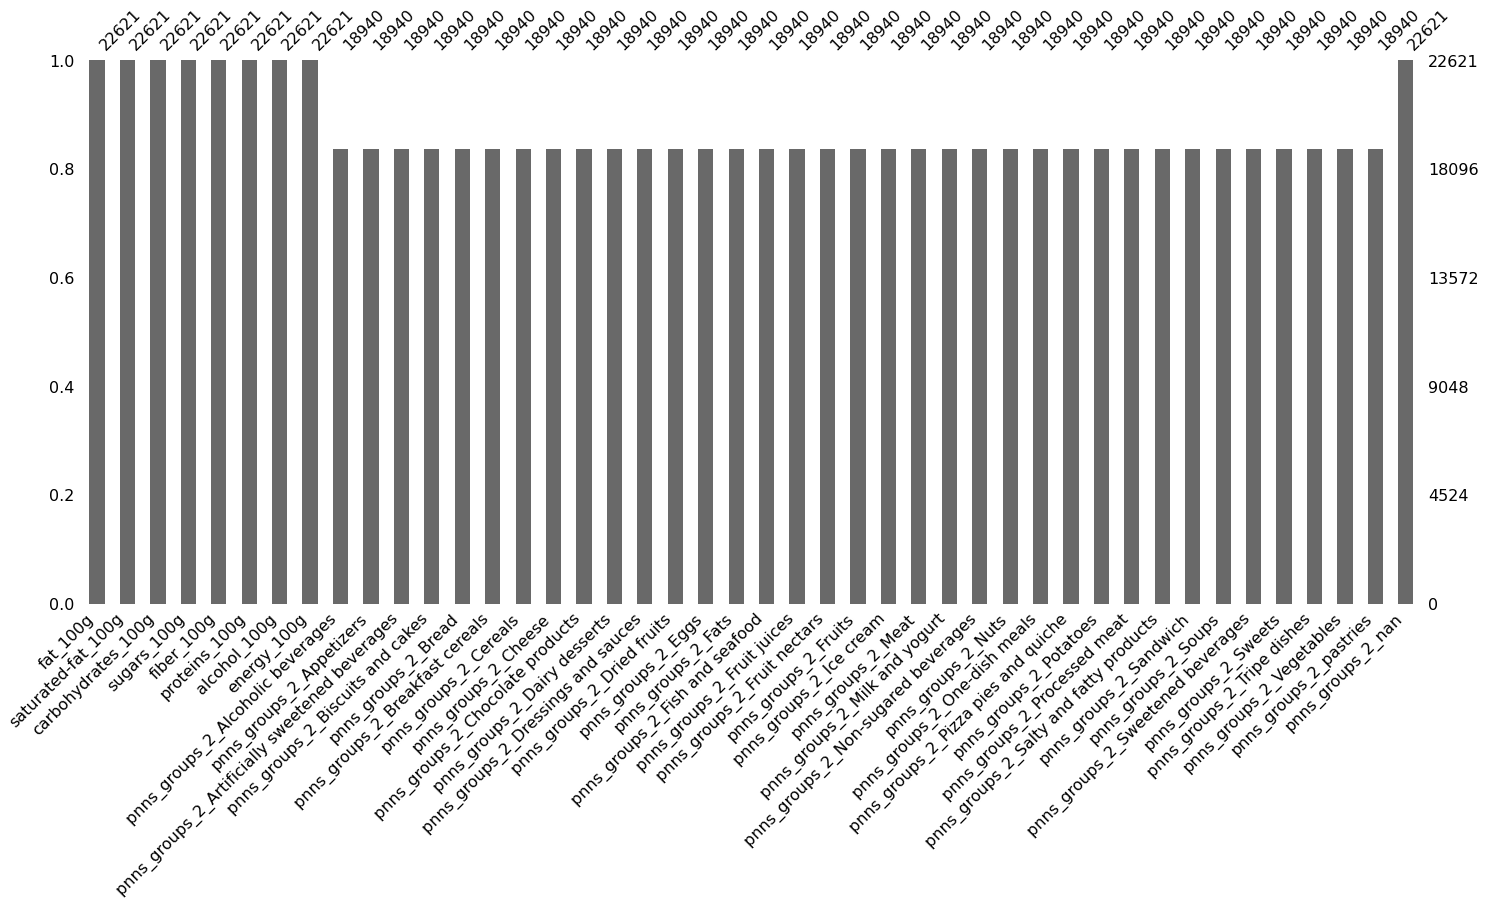

In [47]:
#2ème étape :on impute
#On retire les colonnes non numériques et les colonne 100% NaN de X
X=df_.loc[:,features+[c for c in df_.columns if c.startswith('pnns_groups_2_')]]#df_.select_dtypes(include=['float','int']).columns]
col_X=[i for i in X.columns if X[i].isna().mean()!=1]
X=X.loc[:,col_X]
msno.bar(X)

In [48]:
def optimize_k(data, target, N):
    rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))
    errors = []
    
    for k in range(1, N, 1):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=data.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        
        errors.append({'K': k, 'RMSE': error})
        
    #retourne le k du RMSE min
    r = [errors[i]['RMSE'] for i in range(0,len(errors),1)]
    k = [errors[i]['K'] for i in range(0,len(errors),1)]
    n_opti = k[r.index(min(r))]
    
    #on trace la courbe
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, N), r, color='red', 
             linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=10)

    plt.title(f'Optimum K Value RMSE {target} : {n_opti}  for min RMSE : {min(r)}')
    plt.xlabel('K Value')
    plt.ylabel('RMSE')
    return [n_opti,min(r)]

In [49]:
#On impute colonne par colonne en utilisant à chaque fois le meilleur K
#initialisation
df_c=df_.copy()

<AxesSubplot:>

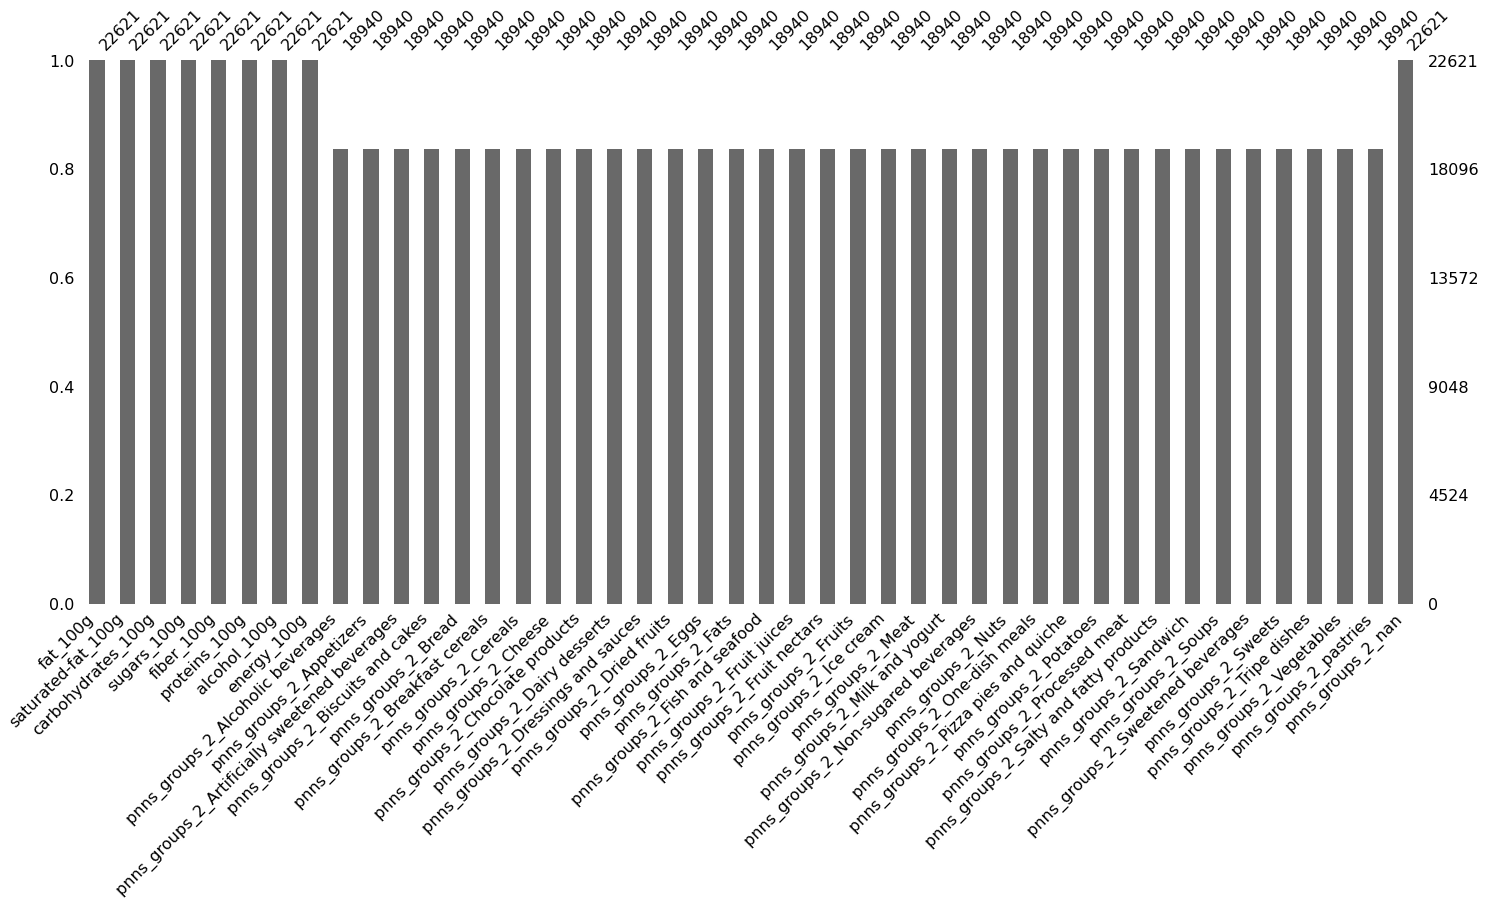

In [50]:
#Test AVANT
msno.bar(df_c[features+[c for c in df_.columns if c.startswith('pnns_groups_2_')]])

C:\Users\John\AppData\Local\Temp\ipykernel_9300\3710281315.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12, 6))


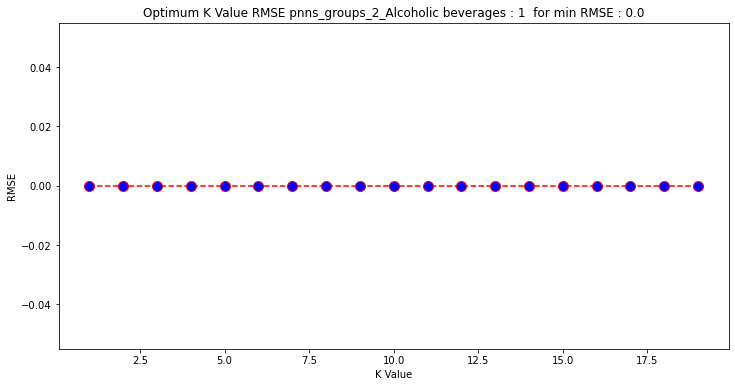

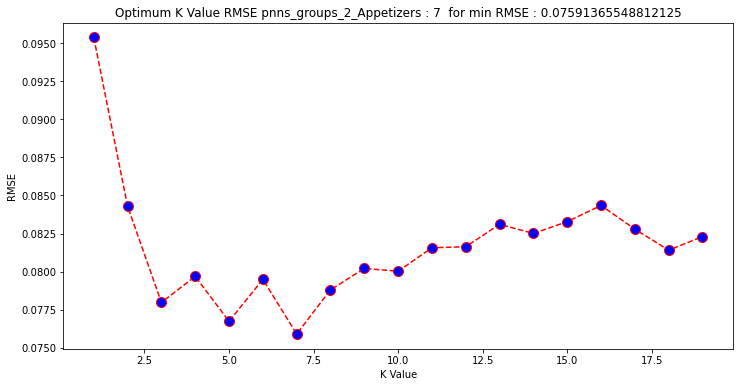

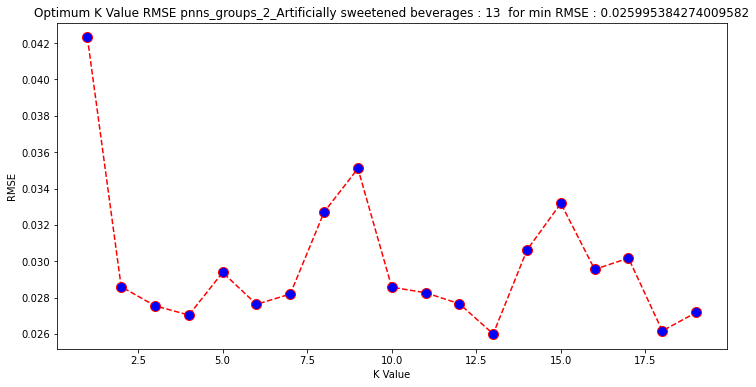

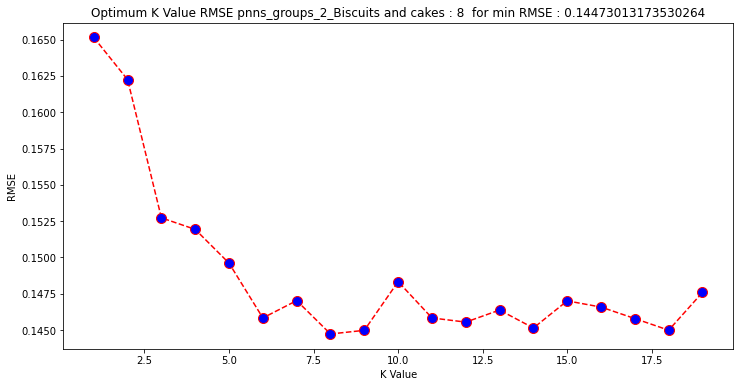

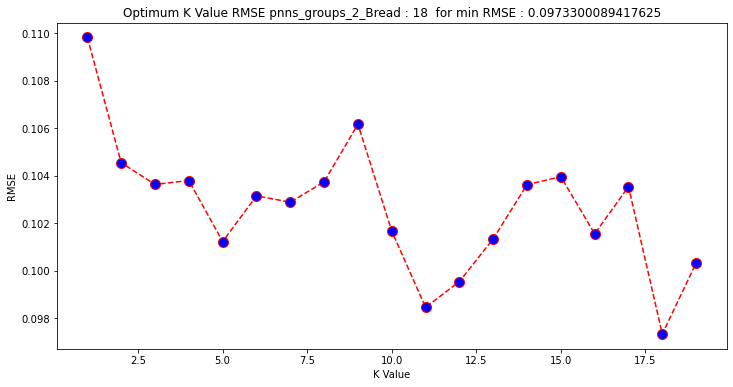

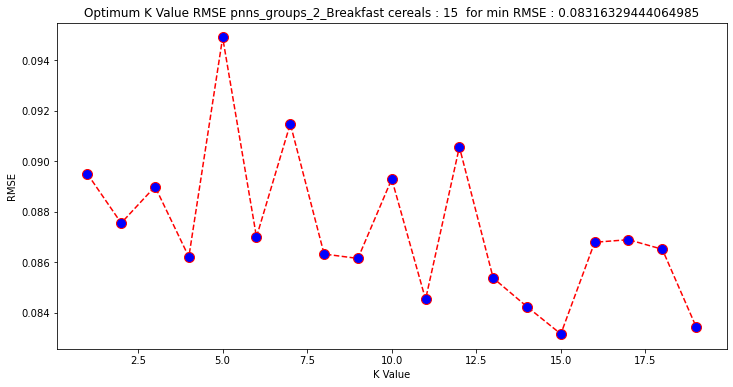

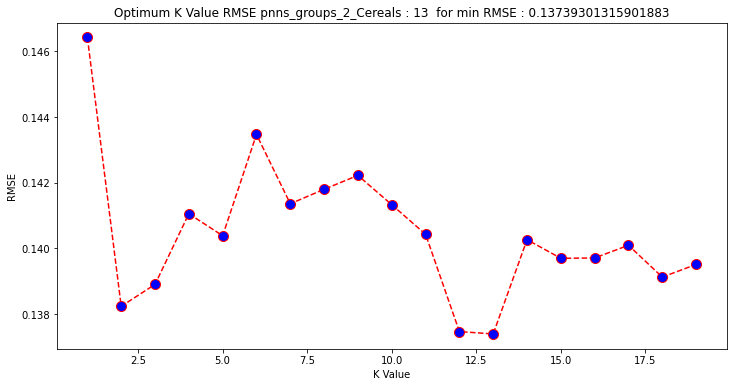

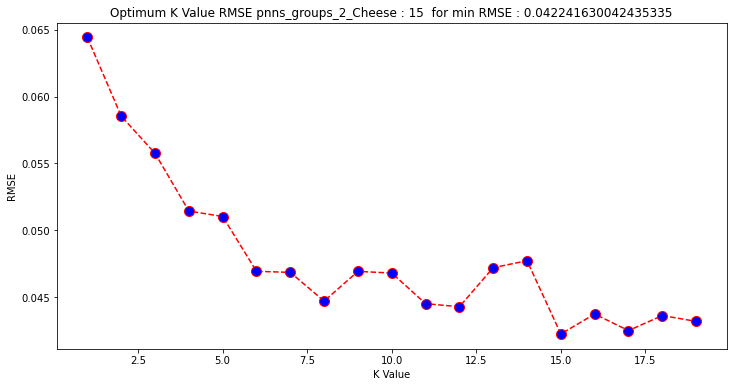

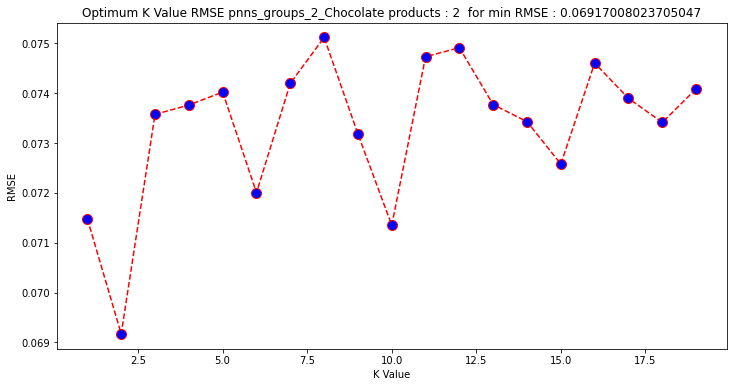

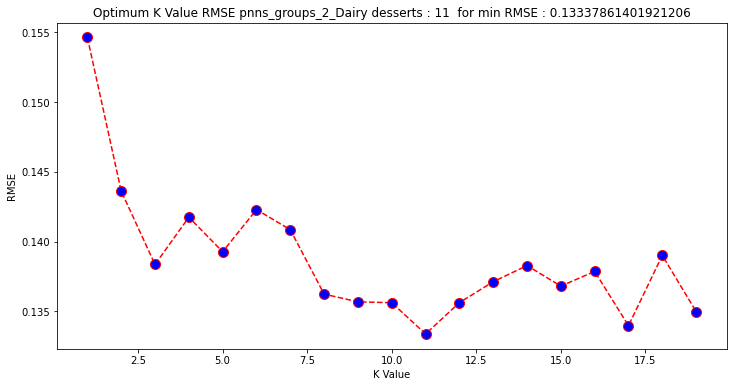

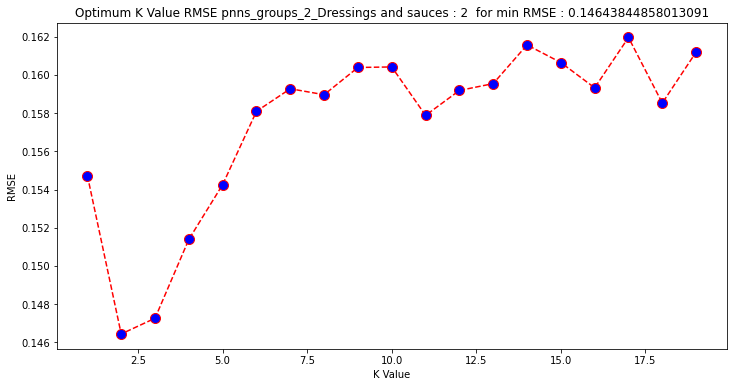

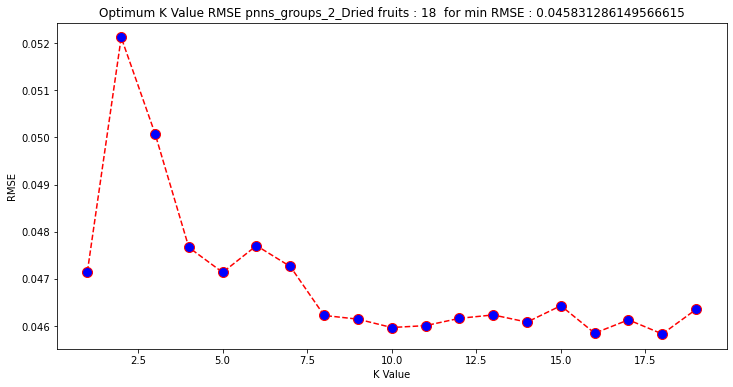

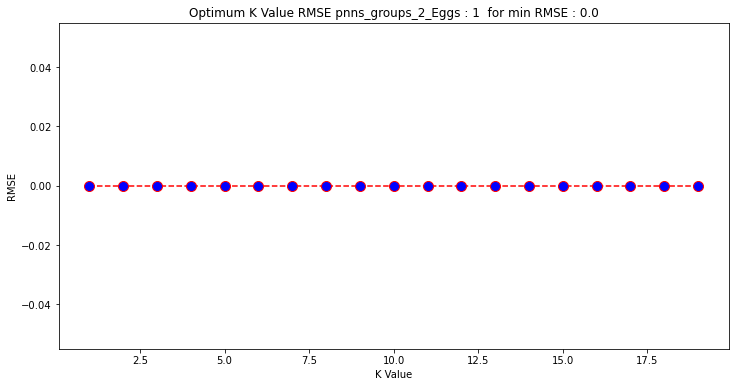

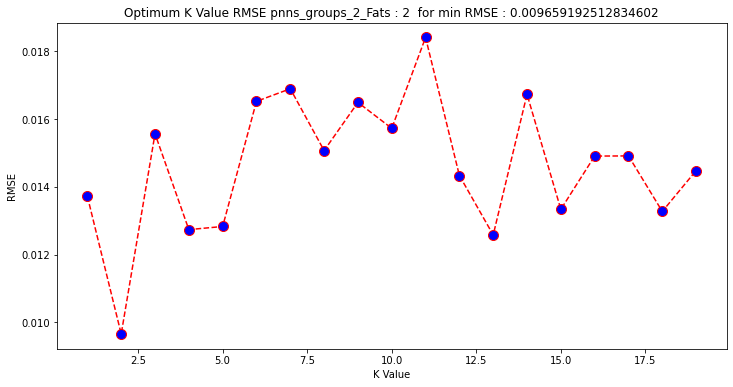

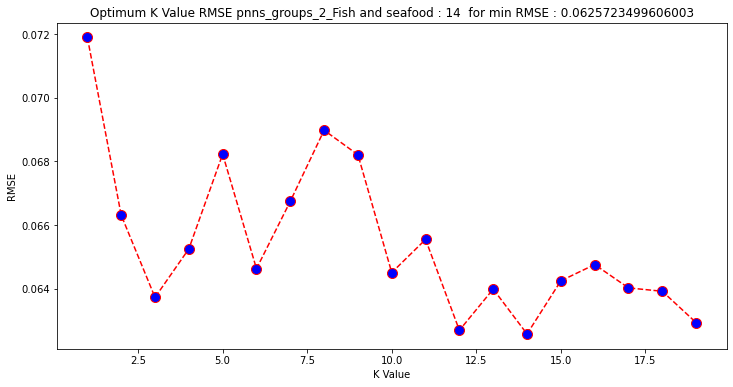

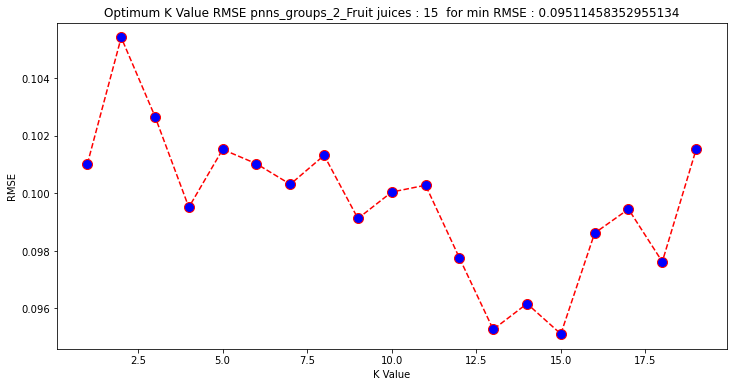

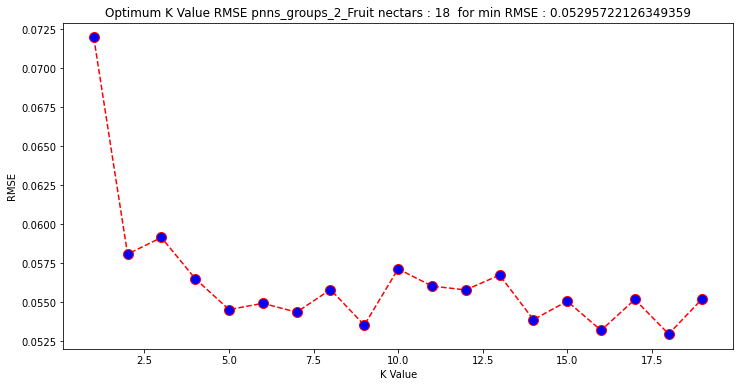

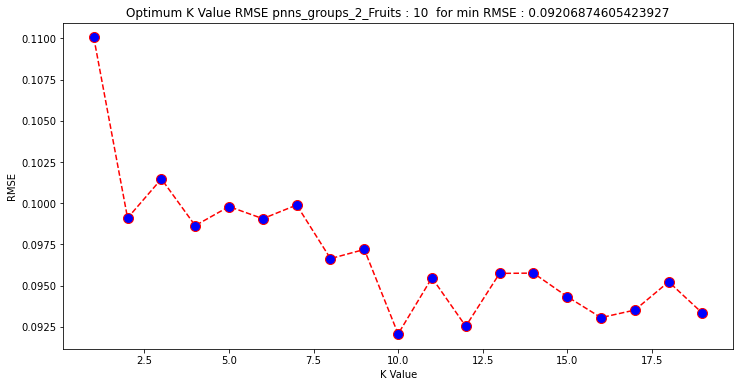

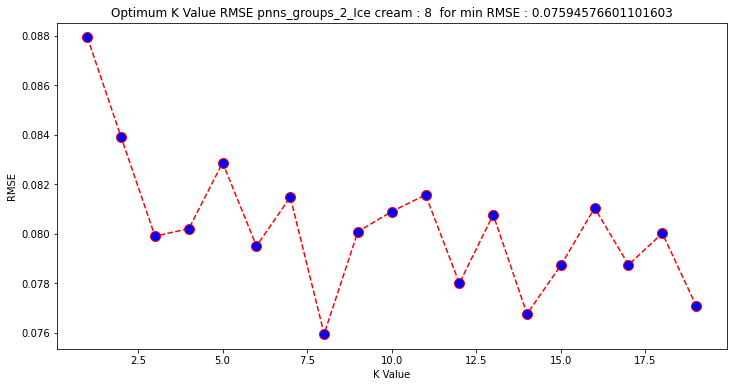

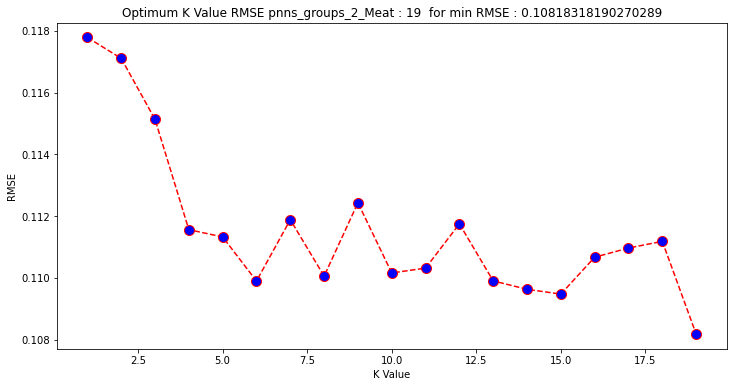

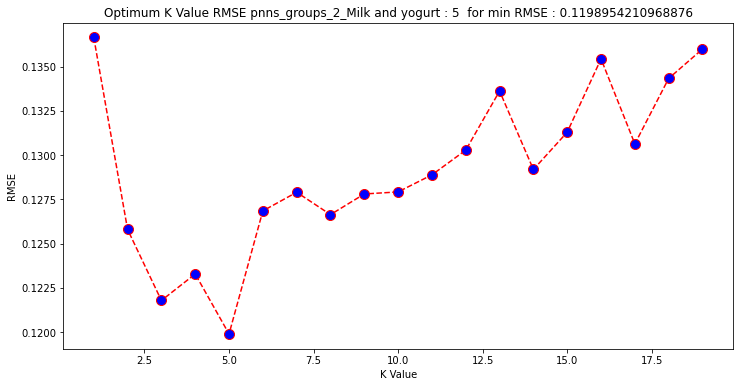

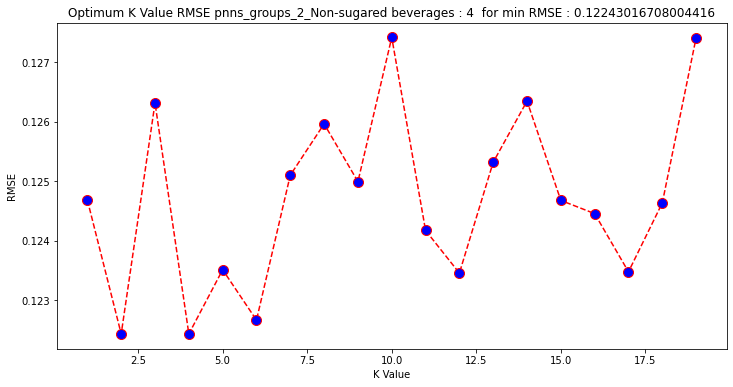

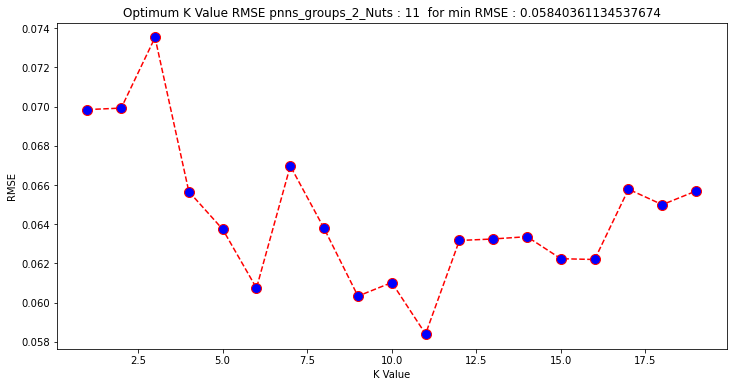

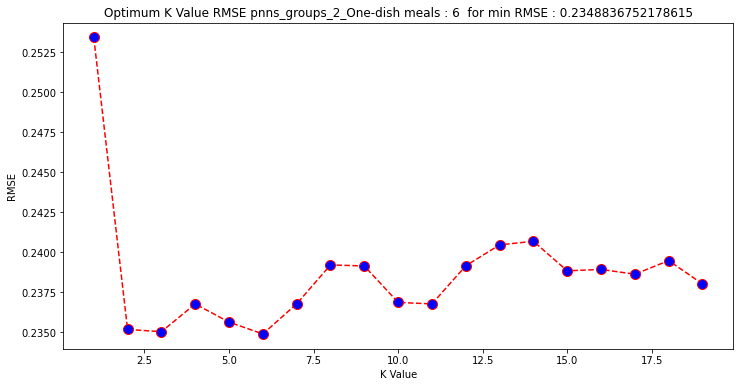

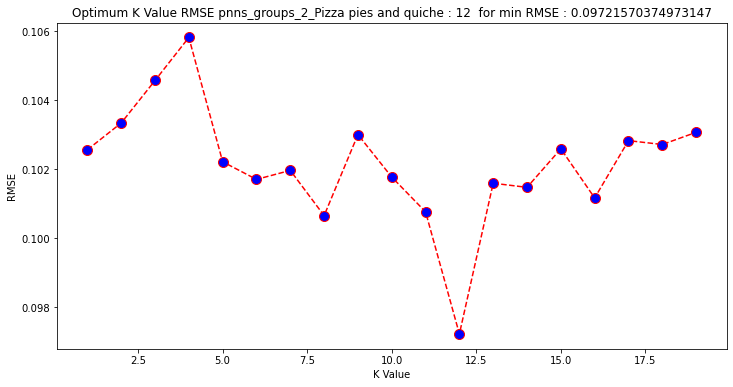

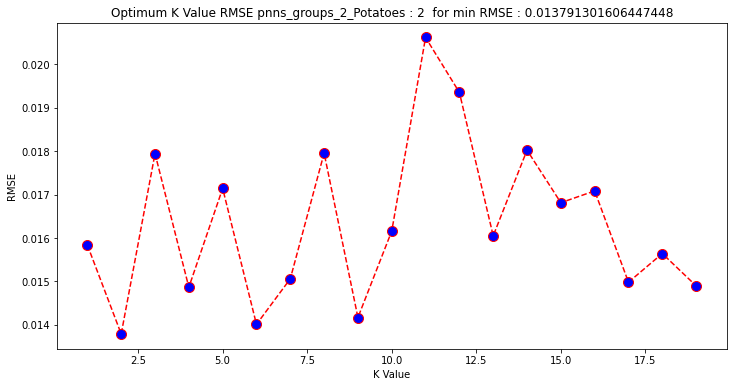

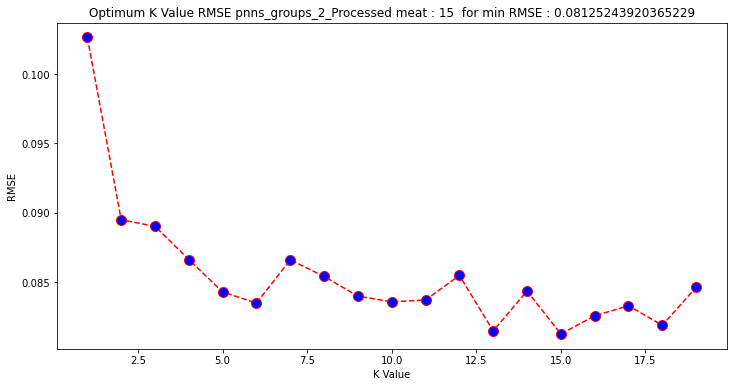

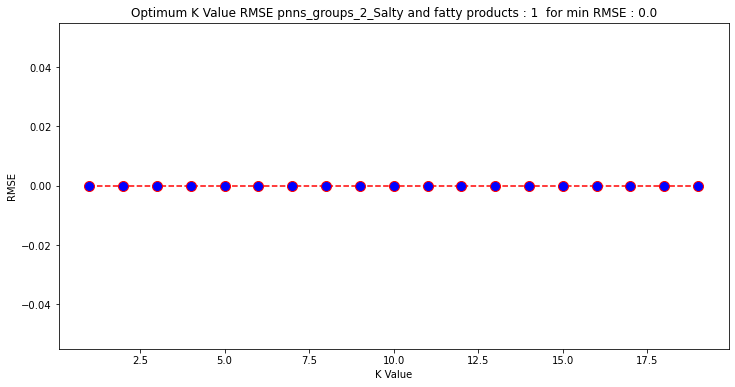

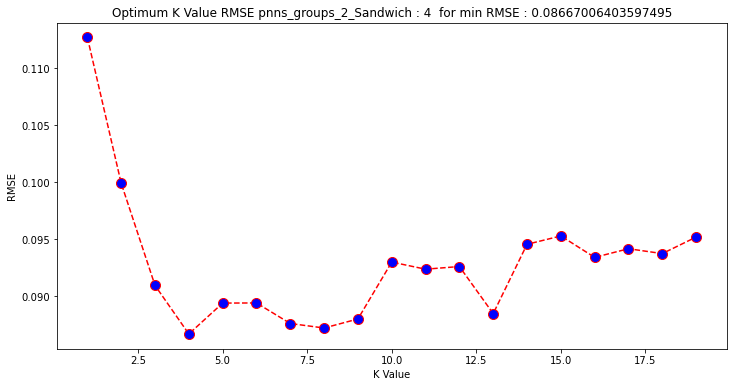

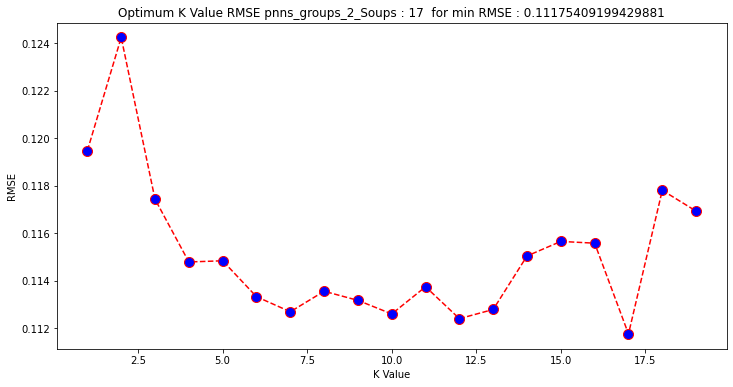

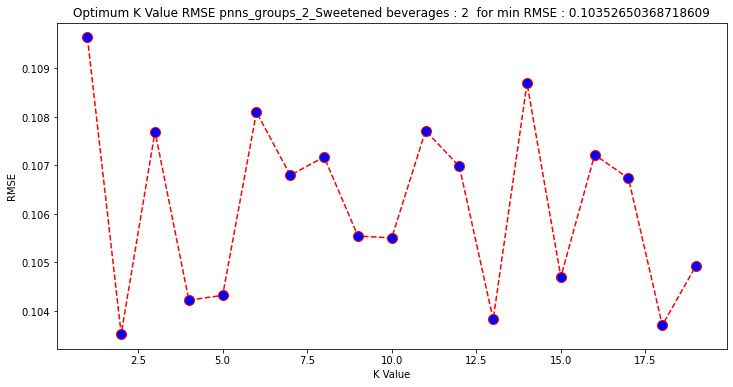

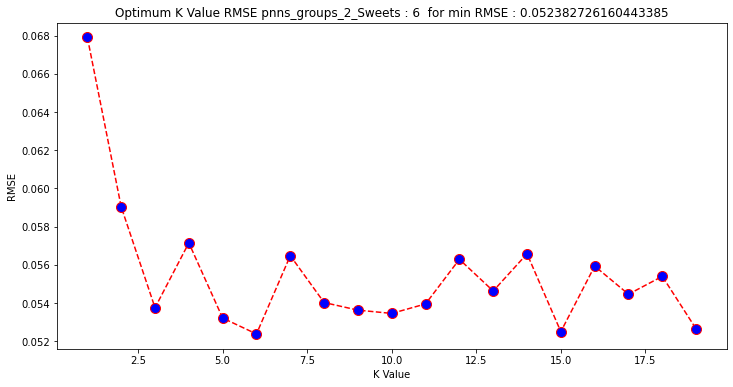

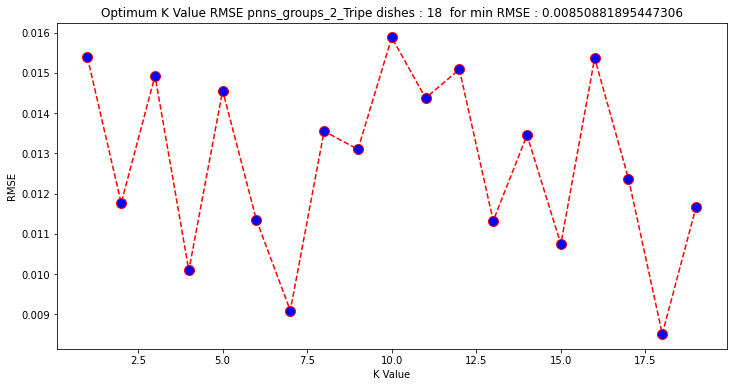

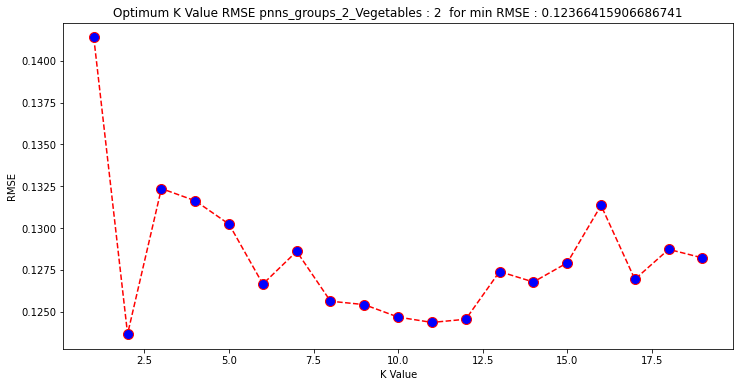

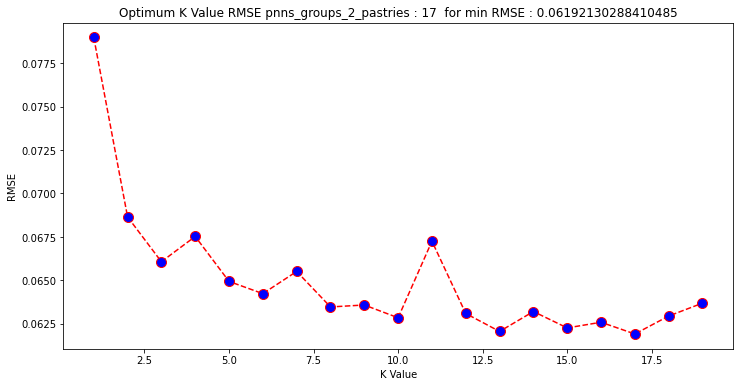

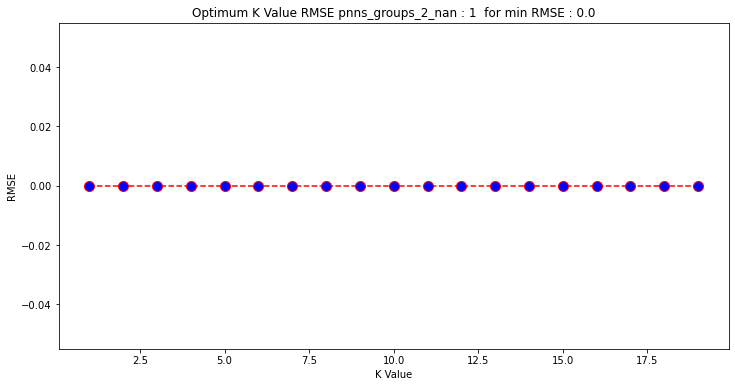

In [51]:
#Boucle sur toutes les colonnes pnns_2
result=[]
thisdict={}
for i in [t for t in df_.columns if t.startswith('pnns_groups_2_')]:
    
    #1-On donne le K, le target et le X
    Target=i
    Xa=df_c.loc[:,[i]+features]
    #Rm: pour réduire le temps de traitement on cherche le meilleur sur un échantillon de 2500 lignes (~10% de Xa)
    result=optimize_k(Xa.iloc[0:2500,:], Target, 20) 
        
    #2-On impute seulement le Target
    imputer = KNNImputer(n_neighbors=result[0])
    df_imp=imputer.fit_transform(Xa)
    df__=pd.DataFrame(df_imp)
    df__.columns=imputer.feature_names_in_
    
    #3-On remplace le Target dans le X de départ par le Target imputé et on reboucle
    df_c.loc[:,i]=df__[i].values
    thisdict[i] = result[1]

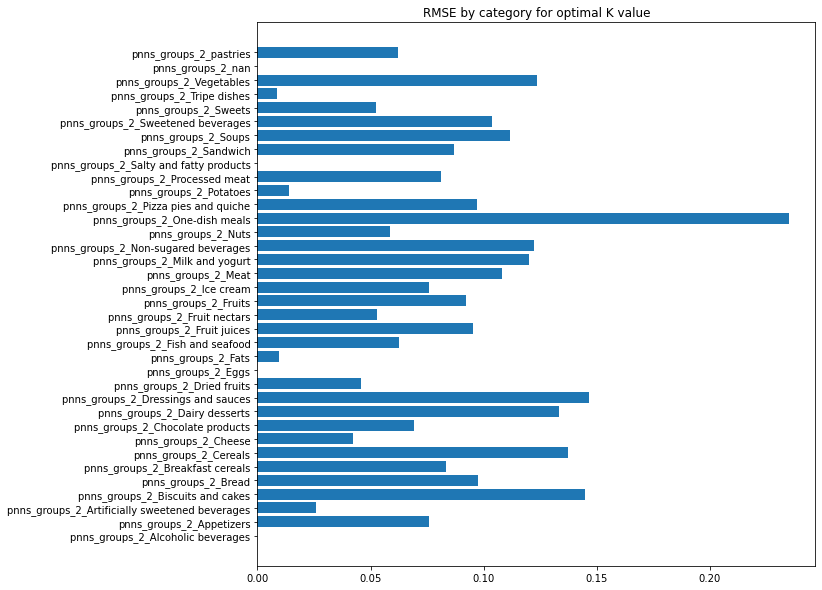

In [52]:
#Le graphe des scores RMSE
plt.figure(figsize=(10,10))
plt.barh(*zip(*sorted(thisdict.items())))
plt.title('RMSE by category for optimal K value')
plt.show()

In [53]:
#on arrondit les valeurs des colonnes HotEncoded à l'entier le plus proche
df_c.loc[:,[i for i in df_c.columns if i.startswith('pnns_groups_2_')==True]]=df_c.loc[:,[i for i in df_c.columns if i.startswith('pnns_groups_2_')==True]].round().values

In [54]:
#Etape 3 : On inverse
#on commence par extraire la partie encodée de df_c =>df__r
df__r=df_c.loc[:,[i for i in df_c.columns if i.startswith('pnns_groups_2_')]]

In [55]:
#il y a des lignes complètement vides. On met un '1' à la col nan pour ces lignes
lv=[i for i in df__r.T.columns if df__r.T[i].sum()==0]

In [56]:
def undummify(df, prefix_sep="pnns_groups_2_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

In [57]:
#On inverse le get_dummy
col_imp=undummify(df__r, prefix_sep="_")

In [58]:
#On remplace la colonne originale par la colonne transformée
df_28=data_i.copy()
df_28.reset_index(inplace=True,drop=True)
col_imp.reset_index(inplace=True,drop=True)
df_28['pnns_groups_2']=col_imp

<AxesSubplot:>

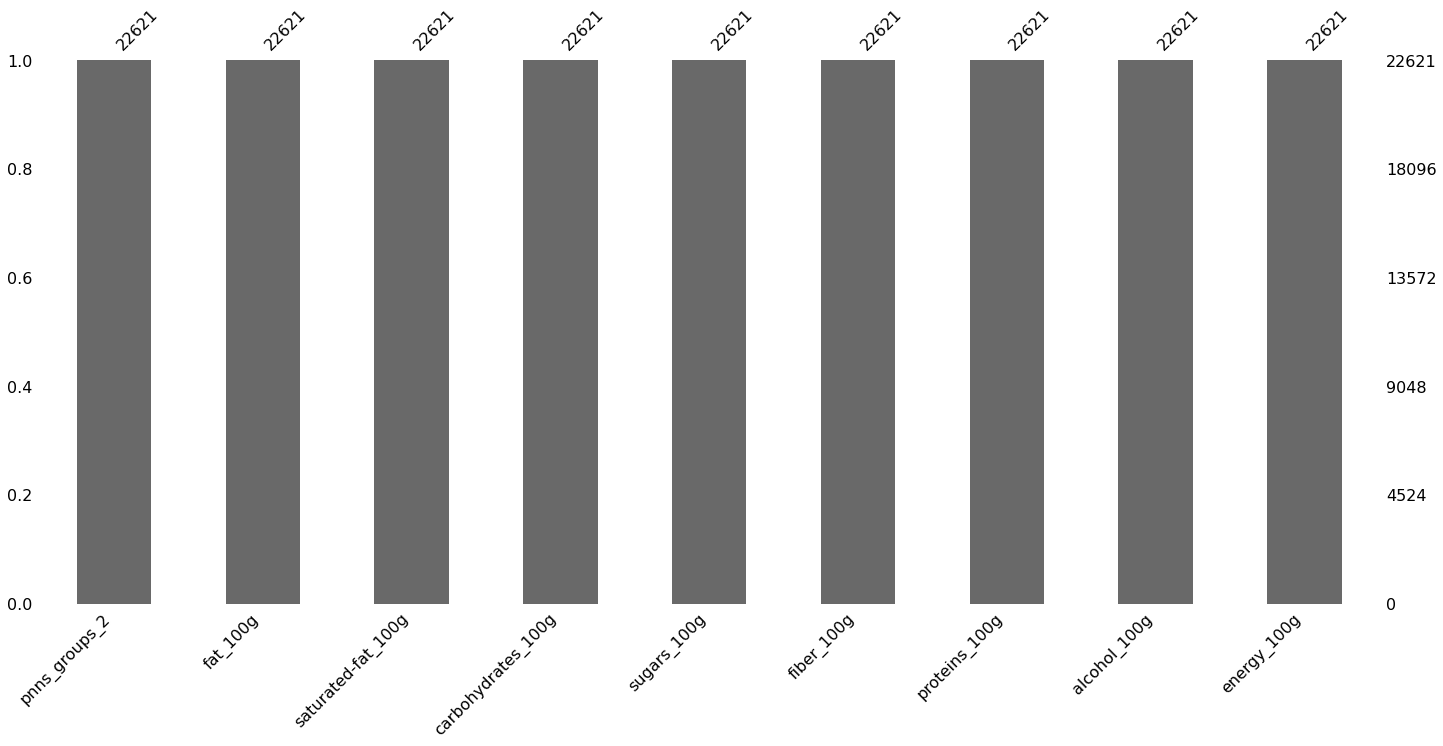

In [59]:
#état final :
msno.bar(df_28.loc[:,['pnns_groups_2']+features])

In [60]:
df_28.to_csv('df_28.csv')